# Exploratory Data Analysis of FAOSTAT Data

This notebook provides an exploratory data analysis of the FAOSTAT dataset from the file FAOSTAT_data_en_8-7-2025.csv.


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [14]:
# Load the FAOSTAT data from the CSV file
data_path = "../notebook/FAOSTAT_data_en_8-7-2025.csv"
df = pd.read_csv(data_path)
print("Dataset loaded with shape:", df.shape)
df.head()

Dataset loaded with shape: (64, 15)


,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
0,FBS,Food Balances (2010-),288,Ghana,5611,Import quantity,2511,Wheat and products,2022,2022,1000 t,881,I,Imputed value,NaN
1,FBS,Food Balances (2010-),288,Ghana,5301,Domestic supply quantity,2511,Wheat and products,2022,2022,1000 t,765,I,Imputed value,NaN
2,FBS,Food Balances (2010-),288,Ghana,5511,Production,2807,Rice and products,2022,2022,1000 t,1283,I,Imputed value,NaN
3,FBS,Food Balances (2010-),288,Ghana,5611,Import quantity,2807,Rice and products,2022,2022,1000 t,812,I,Imputed value,NaN
4,FBS,Food Balances (2010-),288,Ghana,5301,Domestic supply quantity,2807,Rice and products,2022,2022,1000 t,2557,I,Imputed value,NaN


In [15]:
# Display summary statistics for numerical and categorical columns
df.describe(include="all")

,Domain Code,Domain,Area Code (M49),Area,Element Code,Element,Item Code (FAO),Item,Year Code,Year,Unit,Value,Flag,Flag Description,Note
count,64,64,64.0,64,64.000000,64,64.000000,64,64.0,64.0,64,64.000000,64,64,0.0
unique,1,1,NaN,1,NaN,3,NaN,25,NaN,NaN,1,NaN,1,1,NaN
top,FBS,Food Balances (2010-),NaN,Ghana,NaN,Domestic supply quantity,NaN,Yams,NaN,NaN,1000 t,NaN,I,Imputed value,NaN
freq,64,64,NaN,64,NaN,25,NaN,3,NaN,NaN,64,NaN,64,64,NaN
mean,NaN,NaN,288.0,NaN,5466.468750,NaN,2556.203125,NaN,2022.0,2022.0,NaN,1411.343750,NaN,NaN,NaN
std,NaN,NaN,0.0,NaN,138.906497,NaN,69.199775,NaN,0.0,0.0,NaN,4762.620258,NaN,NaN,NaN
min,NaN,NaN,288.0,NaN,5301.000000,NaN,2511.000000,NaN,2022.0,2022.0,NaN,-82.000000,NaN,NaN,NaN
25%,NaN,NaN,288.0,NaN,5301.000000,NaN,2518.000000,NaN,2022.0,2022.0,NaN,0.750000,NaN,NaN,NaN
50%,NaN,NaN,288.0,NaN,5511.000000,NaN,2536.000000,NaN,2022.0,2022.0,NaN,24.000000,NaN,NaN,NaN
75%,NaN,NaN,288.0,NaN,5611.000000,NaN,2555.500000,NaN,2022.0,2022.0,NaN,403.250000,NaN,NaN,NaN


In [16]:
# Check for missing values in each column
missing = df.isnull().sum()
print("Missing values per column:")
print(missing)

Missing values per column:
Domain Code          0
Domain               0
Area Code (M49)      0
Area                 0
Element Code         0
Element              0
Item Code (FAO)      0
Item                 0
Year Code            0
Year                 0
Unit                 0
Value                0
Flag                 0
Flag Description     0
Note                64
dtype: int64


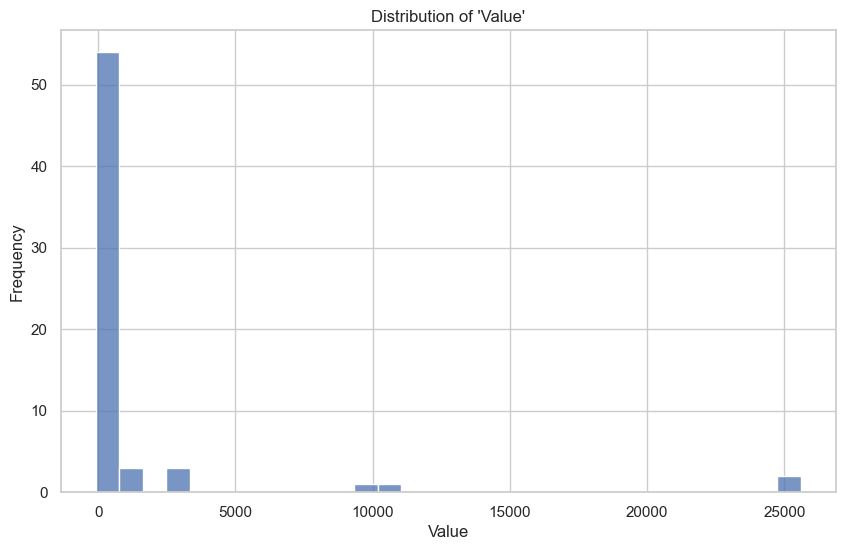

In [17]:
# Plot distribution of a numeric column if available, adjust 'Value' to a relevant column name
if "Value" in df.columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df["Value"], bins=30)
    plt.title("Distribution of 'Value'")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()
else:
    print(
        "Column 'Value' not found in dataset. Please adjust the column name for plotting."
    )

## Conclusion

This notebook provided a basic exploratory data analysis of the FAOSTAT dataset including summary statistics, missing value analysis, and a distribution plot for a numeric column. Further analysis might involve correlation analysis, time series analysis, or a deep dive into specific indicators.


In [18]:
# Analyze individual item amounts
if "Item" in df.columns and "Value" in df.columns:
    item_summary = df.groupby("Item")["Value"].sum().reset_index()
    print("Total amount for each item:")
    display(item_summary)
else:
    print(
        "Columns 'Item' or 'Value' not found in the dataset. Please verify the column names."
    )

Total amount for each item:


,Item,Value
0,Barley and products,48
1,Beans,410
2,Cassava and products,51176
3,"Cereals, other",622
4,Coconuts - Incl Copra,926
5,Groundnuts,1204
6,Honey,0
7,Maize and products,6633
8,Millet and products,396
9,Nuts and products,62


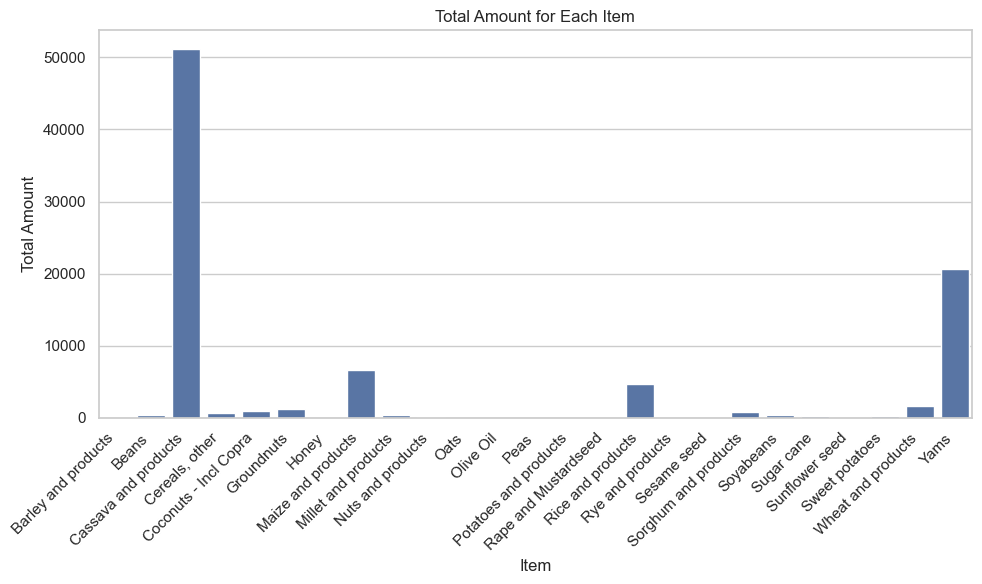

In [19]:
# Visualize total amount for each item in a bar plot
if "Item" in df.columns and "Value" in df.columns:
    item_summary = df.groupby("Item")["Value"].sum().reset_index()
    plt.figure(figsize=(10, 6))
    sns.barplot(data=item_summary, x="Item", y="Value")
    plt.xticks(rotation=45, ha="right")
    plt.title("Total Amount for Each Item")
    plt.xlabel("Item")
    plt.ylabel("Total Amount")
    plt.tight_layout()
    plt.show()
else:
    print(
        "Columns 'Item' or 'Value' not found in the dataset. Please verify the column names."
    )